In [1]:
# object detector
# takes any image and predicts center of hand
# give that to joint predictor so hand can be cropped

In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import math
import timeit
import matplotlib.pyplot as plt
import json
from IPython.display import SVG
from skimage import data
from skimage.transform import resize
from scipy import ndimage
from scipy import misc
import imageio
%matplotlib inline

/Users/annieneuner/anaconda2/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
annotations = json.load(open("hand_annotations.json", 'r'))
num_images = len(annotations)

In [4]:
width = int(405*.4) # 162 # 243 # 405
height = int(720*.4) # 288 # 32 # 720
X = np.ndarray([num_images,height, width, 3])
for i, image in enumerate(annotations):
    image = imageio.imread(image)
    resized_image = resize(image, [height, width])  
    X[i] = resized_image



/Users/annieneuner/anaconda2/lib/python2.7/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


In [5]:
Y = np.zeros([num_images, 2])
for i, image in enumerate(annotations):
    target = annotations[image]
    Y[i] = np.multiply(target, 0.4)

In [6]:
# split into inputs and targets
split = round(num_images*.7)
indices = np.random.choice(num_images, num_images, replace=False)
X = X[indices]
Y= Y[indices]
X_train = X[:int(split)]
Y_train = Y[:int(split)]
X_test = X[int(split):int(num_images)]
Y_test = Y[int(split):int(num_images)]

In [7]:
# tf.losses.mean_pairwise_squared_error
def loss (y_true, y_pred):
    #return np.sqrt((y_true[0] - y_pred[0])**2 + (y_true[1] - y_pred[1])**2)
    return tf.norm(y_true-y_pred, ord='euclidean')

In [8]:
def hand_detector():
    inp = tf.keras.Input(shape=[height,width,3],dtype=tf.float32) 
#     conv1 = tf.keras.layers.Conv2D(64, 13)(inp)
  #  pool1 = tf.keras.layers.AveragePooling2D(2)(inp)
#     conv2 = tf.keras.layers.Conv2D(32, 9)(pool1)
#     pool2 = tf.keras.layers.AveragePooling2D(2)(conv2)
#     conv3 = tf.keras.layers.Conv2D(16, 7)(pool2)
#     pool3 = tf.keras.layers.AveragePooling2D(2)(conv3)
    flat = tf.keras.layers.Flatten()(inp)
    dense_1 = tf.keras.layers.Dense(64, activation=tf.nn.relu)(flat)
    dense_2 = tf.keras.layers.Dense(32, activation=tf.nn.relu)(dense_1)
    dense_3 = tf.keras.layers.Dense(16, activation=tf.nn.relu)(dense_2)
    dense_4 = tf.keras.layers.Dense(8, activation=tf.nn.relu)(dense_3)
    dense_5 = tf.keras.layers.Dense(4, activation=tf.nn.relu)(dense_4)
    output = tf.keras.layers.Dense(2, activation=tf.nn.relu)(dense_5)
    model = tf.keras.Model(inputs=inp, outputs=output)
    return model

In [9]:
# gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.7)
# sess = tf.Session(config=tf.ConfigProto(gpu_options=gpu_options))

model = hand_detector()
print ("Hand Detector")
model.summary()

# config = tf.ConfigProto()
# config.gpu_options.allow_growth = True

# session = tf.Session(config=config)

Hand Detector
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 288, 162, 3)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 139968)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8958016   
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_4 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_5 (Dense)              (None, 4)                 36     

In [10]:
model.compile('adam', loss, metrics=['accuracy'])
model.fit(x=X_train, y=Y_train, epochs=100, batch_size=32, verbose=2)


Epoch 1/100
 - 1s - loss: 924.8351 - acc: 0.0000e+00
Epoch 2/100
 - 0s - loss: 892.9274 - acc: 0.0000e+00
Epoch 3/100
 - 0s - loss: 849.1567 - acc: 0.0000e+00
Epoch 4/100
 - 0s - loss: 831.5452 - acc: 0.0000e+00
Epoch 5/100
 - 0s - loss: 830.0281 - acc: 0.0000e+00
Epoch 6/100
 - 0s - loss: 839.9583 - acc: 0.0000e+00
Epoch 7/100
 - 0s - loss: 846.1594 - acc: 0.0000e+00
Epoch 8/100
 - 0s - loss: 844.4922 - acc: 0.0000e+00
Epoch 9/100
 - 0s - loss: 838.7034 - acc: 0.0000e+00
Epoch 10/100
 - 0s - loss: 829.3336 - acc: 0.0000e+00
Epoch 11/100
 - 0s - loss: 616.3077 - acc: 0.0000e+00
Epoch 12/100
 - 0s - loss: 553.7425 - acc: 0.0000e+00
Epoch 13/100
 - 0s - loss: 528.9926 - acc: 0.0000e+00
Epoch 14/100
 - 0s - loss: 494.8353 - acc: 0.0000e+00
Epoch 15/100
 - 0s - loss: 454.3119 - acc: 0.0000e+00
Epoch 16/100
 - 0s - loss: 409.1854 - acc: 0.0000e+00
Epoch 17/100
 - 0s - loss: 365.8149 - acc: 0.0000e+00
Epoch 18/100
 - 0s - loss: 331.0531 - acc: 0.0000e+00
Epoch 19/100
 - 0s - loss: 278.5533 -

In [11]:
Yhat_test = model.predict(X_test)

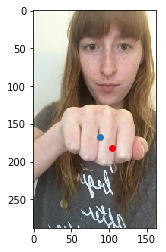

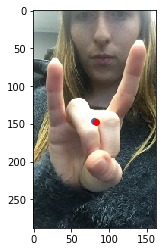

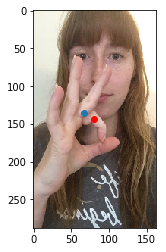

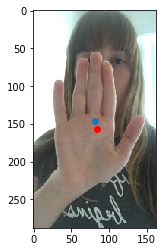

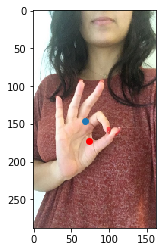

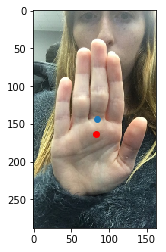

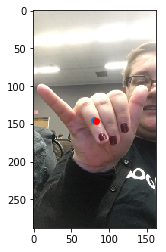

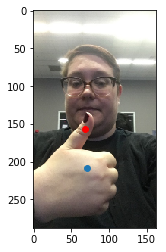

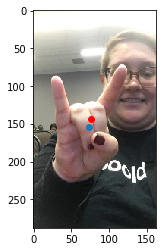

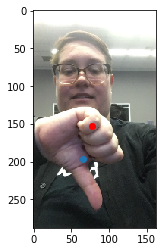

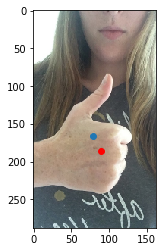

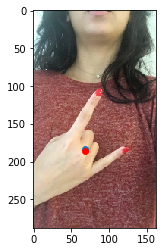

In [12]:
for i, image in enumerate(X_test):
    plt.imshow(image)
    plt.scatter(Y_test[i][0], Y_test[i][1], s=35)
    plt.scatter(Yhat_test[i][0], Yhat_test[i][1], c='red', s=35)
    plt.show()

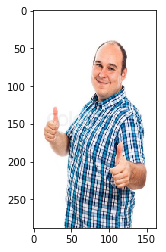

In [35]:
from PIL import Image
import os, glob
#get number of files

#file_path = "/Users/annieneuner/Desktop/175/images/"
file_path ="/Users/annieneuner/Desktop/175/1_downloads/"

path, dirs, files = next(os.walk(file_path))
file_count = len(files)

width = int(405*.4) # 162 # 243 # 405
height = int(720*.4) # 288 # 32 # 720

import glob
Xall = np.ndarray([file_count-1,height, width, 3])

file_path_all = file_path + "*"
for i, file in enumerate(glob.glob(file_path_all)):   
    image = file
    image = imageio.imread(image)
    plt.imshow(image)
    #print(image.shape)
    resized_image = resize(image, [height, width])  
    Xall[i] = resized_image
    plt.imshow(resized_image)
#print(i)
#for imgs in Xall:
 #   plt.imshow(imgs)


In [36]:
Yhat = model.predict(Xall)
print(Yhat.shape)

(25, 2)


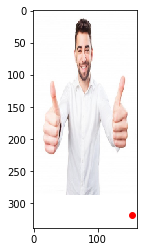

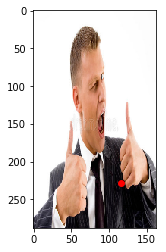

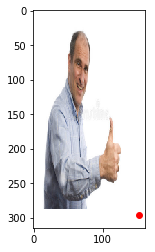

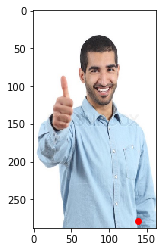

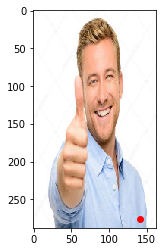

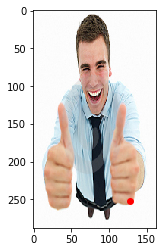

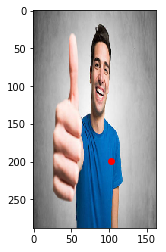

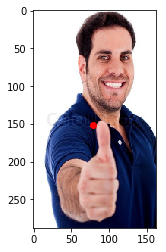

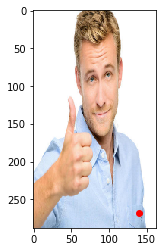

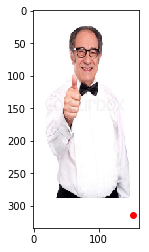

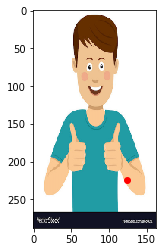

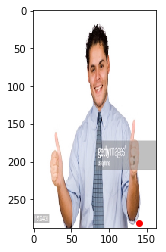

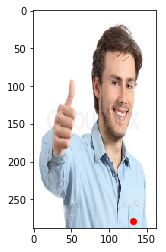

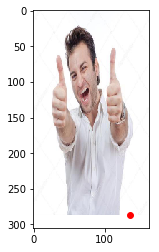

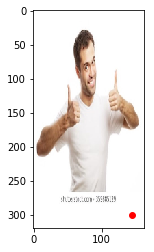

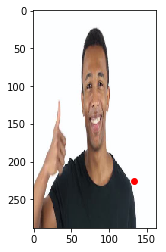

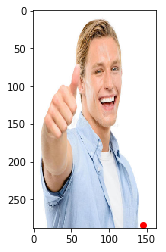

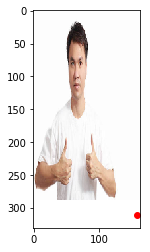

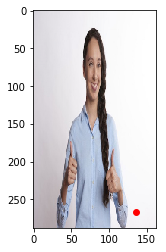

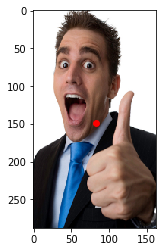

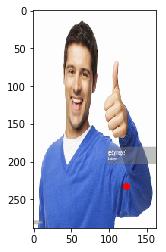

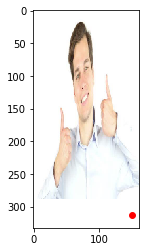

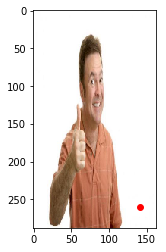

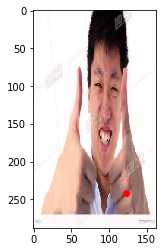

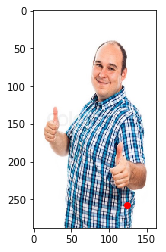

In [37]:
for i, image in enumerate(Xall):
    plt.imshow(image)
    plt.scatter(Yhat[i][0], Yhat[i][1], c='red', s=35)
    plt.show()

In [39]:
from PIL import Image
import os, glob

def crop(image_path, coords, saved_location):
    """
    @param image_path: The path to the image to edit
    @param coords: A tuple of x/y coordinates (x1, y1, x2, y2)
    @param saved_location: Path to save the cropped image
    """
    image_obj = Image.open(image_path)
    cropped_image = image_obj.crop(coords)
    cropped_image.save(saved_location)
    #cropped_image.show()

import ntpath
ntpath.basename(file_path)

def path_leaf(path):
    head, tail = ntpath.split(path)
    return tail or ntpath.basename(head)

import glob
size = 90
i=0
for file in glob.glob(file_path_all):   
    image = file
    #resized_image = cv2.resize(image, (405, 720)) 

    #x1 = Yhat[i][0]-90
    #x1 *=2
    #x2 = Yhat[i][0]+90
    #x2 *=2
    x1 = 0
    x2 = 405
    y1 = Yhat[i][1]*2.5
    y1 -=203
    y2 = Yhat[i][1]*2.5
    y2 +=202
    path = "/Users/annieneuner/Desktop/175/cropped/" + path_leaf(image)
    #crop(image, (x1, x2, y1, y2), path)
    crop(image, (x1,y1,x2, y2), path)
